In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("final.df.csv")
df.shape

(200000, 80)

In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_range_mean,sub_grade_num,emp_length_num
count,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,14740.615375,14.047924,445.564543,7.432490e+04,18.931042,0.326485,0.694805,38.589950,11.683355,0.226445,1.590229e+04,52.740852,24.888360,12636.221310,2478.097381,2.624044,560.785900,3799.395097,641.761105,610.148025,0.018800,0.005245,230.022100,1.334342e+05,1.050920,2.714855,0.873715,1.915005,19.761910,3.351007e+04,70.205415,1.262295,2.713755,5505.012450,61.995210,3.119424e+04,1.167065,1.669000,2.407435,4.898570,12652.200355,9305.872275,61.043219,0.008975,16.915020,123.496620,177.572560,12.592685,7.572270,1.583020,23.051050,7.020060,41.13807,0.522660,3.702345,4.719860,7.997870,5.726970,0.003425,0.088390,2.271730,94.162227,46.697567,0.142080,0.054800,20540.207830,695.489473,12.822720,5.946410
std,8752.102580,4.954058,262.118049,7.020791e+04,11.675555,0.886051,0.964933,21.663606,5.529451,0.631672,2.076584e+04,24.399791,12.065927,9763.746055,2626.966900,13.561922,1410.832467,6281.502295,89.661439,169.790827,0.152829,0.079168,1775.613015,1.492501e+05,1.189981,2.953508,1.056642,2.005857,25.708152,4.046119e+04,23.289368,1.358994,2.337575,5174.260522,19.674457,3.094635e+04,1.683867,2.932574,2.615008,3.280455,15288.478032,14277.046880,28.251856,0.104616,943.077677,53.847389,94.626771,15.829046,8.539039,1.974375,30.106178,6.059382,21.84772,1.333422,2.268906,2.960616,4.750692,3.267695,0.062636,0.485539,1.894223,8.728537,36.143285,0.386451,0.436312,20559.740281,30.408820,6.669401,3.699005
min,500.000000,5.310000,14.010000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000,0.000000,0.000000,0.000000,0.00

In [6]:
df[df['dti'] == 999]

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_range_mean,sub_grade_num,emp_length_num,term,grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,application_type,disbursement_method,debt_settlement_flag
13551,35000,14.08,1197.58,600.0,999.0,0,0,68,10,1,12427,79.7,22,14215.29000,3139.01,0.0,3652.4,1197.58,544,540,0,0,1875,58935,0,2,1,4,9,46508,44,1,1,1823,56,15600.0,7,4,8,5,5894,630,90.2,0,0,130,245,9,9,0,9,1,65,0,4,4,6,7,0,0,2,95.5,100.0,1,0,6400.0,677.0,13,10,36 months,C,RENT,Not Verified,Charged Off,debt_consolidation,CA,w,Joint App,Cash,N
20168,15000,10.90,325.39,1000.0,999.0,0,0,40,9,0,11351,53.5,15,15014.44583,14.45,0.0,0.0,15023.53,714,710,0,0,0,362851,3,1,0,1,13,32933,39,2,2,3614,54,21200.0,1,1,4,5,40317,7278,60.0,0,0,68,156,3,3,2,3,7,37,0,5,5,7,6,0,0,3,100.0,0.0,0,0,18200.0,717.0,9,0,60 months,B,MORTGAGE,Source Verified,Fully Paid,credit_card,AZ,w,Joint App,Cash,N
23005,19500,14.99,463.81,1000.0,999.0,0,0,56,10,0,10760,44.3,17,24180.08073,4680.08,0.0,0.0,14456.31,749,745,0,0,0,54489,0,3,1,1,8,43729,65,0,1,4568,59,24300.0,0,2,1,2,6054,7740,58.2,0,0,140,129,22,8,1,56,8,56,0,3,4,6,3,0,0,1,94.1,50.0,0,0,18500.0,732.0,14,0,60 months,C,MORTGAGE,Source Verified,Fully Paid,debt_consolidation,OK,w,Joint App,Cash,N
110372,5000,7.35,155.19,20.0,999.0,0,0,32,6,1,601,4.1,13,1097.25000,194.97,15.0,0.0,170.19,654,650,0,0,0,601,1,0,1,2,10,0,13,1,3,0,4,14800.0,0,7,0,5,120,3500,0.0,0,0,146,185,5,5,0,16,3,74,0,0,1,1,2,0,0,2,100.0,0.0,1,0,3500.0,707.0,4,10,36 months,A,OWN,Not Verified,Charged Off,debt_consolidation,CO,w,Joint App,Cash,N
118704,10000,25.34,295.51,1000.0,999.0,0,0,55,8,0,31639,65.0,19,10744.32217,744.32,0.0,0.0,10167.38,719,715,0,0,0,356022,0,2,2,2,7,46642,93,1,1,17453,79,48700.0,0,1,1,3,44503,15761,66.7,0,0,162,151,11,7,4,11,7,49,0,3,4,5,3,0,0,3,100.0,50.0,0,0,47400.0,737.0,23,0,60 months,E,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,VA,w,Joint App,Cash,N
131568,35000,12.79,1175.76,2000.0,999.0,0,1,26,14,1,7325,48.8,17,28193.37000,6382.59,0.0,0.0,1175.76,499,0,0,0,0,72401,4,3,1,2,12,65076,71,8,10,1870,65,15000.0,2,0,8,12,5172,2700,52.6,0,0,36,322,1,1,0,7,1,79,0,2,2,2,10,0,0,9,100.0,50.0,1,0,5700.0,692.0,11,0,36 months,C,RENT,Not Verified,Charged Off,debt_consolidation,CA,w,Joint App,Cash,N
186395,15000,17.09,373.52,1200.0,999.0,1,1,9,13,0,7531,34.5,24,17652.08922,2652.09,0.0,0.0,13198.33,684,680,0,0,0,104173,2,4,1,2,1,56526,60,1,4,923,52,21800.0,0,4,2,6,8013,4017,30.7,0,0,132,298,0,0,1,19,0,9,1,2,3,5,6,0,0,2,91.7,0.0,0,0,5800.0,717.0,16,10,60 months,D,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,MI,w,Joint App,Cash,N


### dummification for categorical variables

In [7]:
print(df.dtypes.value_counts())

int64      53
float64    16
object     11
dtype: int64


In [8]:
x_old = df[df.columns.difference(['loan_status'])]
y = df[['loan_status']]

In [9]:
x = pd.get_dummies(x_old, drop_first=True)

In [10]:
x.shape

(200000, 150)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 1. Logistic Regression

In [29]:
log = LogisticRegression()

log.fit(x_train, y_train)

print('training prediction accuracy :  %.2f' % log.score(x_train, y_train))
print('test prediction accuracy :  %.2f' % log.score(x_test, y_test))

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


training prediction accuracy :  1.00
test prediction accuracy :  0.99


In [30]:
lr_log = LogisticRegression()
lr_log.fit(x_train, y_train)
lr_pred = lr_log.predict(x_test)

print('accuracy : %.2f' % accuracy_score(y_test, lr_pred))

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.99


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
test_pred_prob = lr_log.predict_proba(x_test)
roc_auc_score(y_test, test_pred_prob[:,1])

0.9992167568627003

### 2. Random Forest

In [32]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print('rf accuracy : {0:.4f}' .format(accuracy))

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


rf accuracy : 0.9800


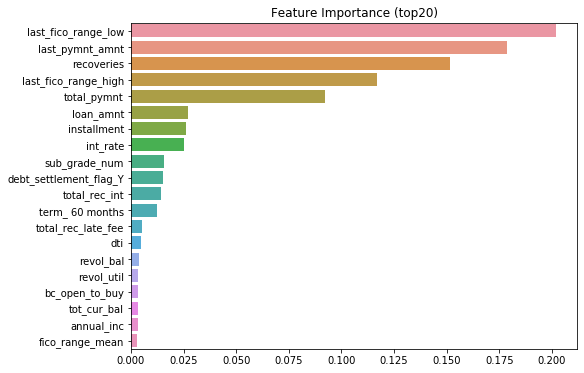

In [34]:
feature_imp = rf_clf.feature_importances_
feature_imp = pd.Series(feature_imp, index=x_train.columns)
feature_top20 = feature_imp.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importance (top20)')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()